---
title: "Homework 2"
format: html
---

__Due Date:__ 2024-10-16 at 8:30 AM PT
---


__Name:__ \<Omar Al-Ani\>



For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

## Preparation

1. Create a 'data' folder in the root directory of this repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.




## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [40]:
import pandas as pd

file_path = 'data/raw/NRI_Table_Counties/NRI_Table_Counties.csv'  

# Load the CSV data and ensure 'STCOFIPS' is read as a string
nri_df = pd.read_csv(file_path, dtype={'STCOFIPS': str})

# Preview the data to confirm it's loaded properly
print(nri_df.head()) 

   OID_  NRI_ID    STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0     1  C01001  Alabama         AL          1  Autauga     County   
1     2  C01003  Alabama         AL          1  Baldwin     County   
2     3  C01005  Alabama         AL          1  Barbour     County   
3     4  C01007  Alabama         AL          1     Bibb     County   
4     5  C01009  Alabama         AL          1   Blount     County   

   COUNTYFIPS STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1    01001       58764  ...  15.784587             Very Low   
1           3    01003      231365  ...  56.205509  Relatively Moderate   
2           5    01005       25160  ...  18.632002       Relatively Low   
3           7    01007       22239  ...  13.308573             Very Low   
4           9    01009       58992  ...  23.645930       Relatively Low   

      WNTW_ALRB     WNTW_ALRP     WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  2.687716e-07  7.410082e-09  8.725777e-06      10.

__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__


In [41]:
# Select columns that end with '_AFREQ' or '_RISKR'
afreq_columns = [col for col in nri_df.columns if col.endswith('_AFREQ')]
riskr_columns = [col for col in nri_df.columns if col.endswith('_RISKR')]

# Combine the selected columns and include 'STCOFIPS'
selected_columns = ['STCOFIPS'] + afreq_columns + riskr_columns

# Subset the dataframe
nri_subset = nri_df[selected_columns]

# Preview the subsetted data
print(nri_subset.head())


  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    01001         NaN         NaN         0.0   25.969774    0.000431   
1    01003         NaN    3.684142         0.0   12.353442    0.000338   
2    01005         NaN         NaN         0.0   43.956953    0.000227   
3    01007         NaN         NaN         0.0   28.894501    0.000790   
4    01009         NaN         NaN         0.0   28.152598    0.000817   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...           ISTM_RISKR  \
0    2.806764    0.371517    0.080450    0.402025  ...             Very Low   
1    1.529256    0.939761    0.248233    0.191996  ...       Relatively Low   
2    1.908785    0.371517    0.116398    0.393288  ...             Very Low   
3    3.447868    0.371517    0.066724    0.413094  ...       Relatively Low   
4    5.101344    0.371517    0.039238    0.509665  ...  Relatively Moderate   

       LNDS_RISKR           LTNG_RISKR           RFLD_RISKR  \
0  Relatively Low

__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__


In [42]:
# Get hazard types by removing '_AFREQ' suffix from afreq_columns 
hazard_types = [col.replace('_AFREQ', '') for col in afreq_columns]

# Initialize a list to store the counts
missing_values = []

# Loop through each hazard type
for hazard in hazard_types:
    afreq_col = f"{hazard}_AFREQ"
    riskr_col = f"{hazard}_RISKR"
    
    afreq_missing = nri_subset[afreq_col].isnull().sum()
    riskr_missing = nri_subset[riskr_col].isnull().sum()
    
    missing_values.append({
        'Hazard': hazard,
        'Missing_AFREQ': afreq_missing,
        'Missing_RISKR': riskr_missing
    })

# Create a DataFrame from the list
missing_df = pd.DataFrame(missing_values)

# Display the DataFrame
print(missing_df)
print(f'sum of missing values = {nri_subset.isnull().sum().sum()}') # just to fonfirm the total sum of missing values is same as above 

   Hazard  Missing_AFREQ  Missing_RISKR
0    AVLN           3023              0
1    CFLD           2646              0
2    CWAV              0              0
3    DRGT              7              0
4    ERQK              0              0
5    HAIL              7              0
6    HWAV              0              0
7    HRCN            918              0
8    ISTM            229              0
9    LNDS             40              0
10   LTNG            123              0
11   RFLD              0              0
12   SWND              7              0
13   TRND              7              0
14   TSUN           3103              0
15   VLCN           3125              0
16   WFIR             88              0
17   WNTW              0              0
sum of missing values = 13323


__4. Show the cross-tabulation of the 'AVLN_AFREQ' and 'AVLN_RISKR' columns (including missing values). What do you observe?__


In [43]:
cross_tab = pd.crosstab(nri_subset['AVLN_AFREQ'], nri_subset['AVLN_RISKR'], dropna=False)
cross_tab
# we observe that when fequency increases risk level increases as well

AVLN_RISKR,Not Applicable,Relatively High,Relatively Low,Relatively Moderate,Very High,Very Low
AVLN_AFREQ,,,,,,
0.010000,0,0,0,0,0,24
0.016667,0,0,0,0,0,55
0.033333,0,0,14,0,0,15
0.050000,0,0,10,2,0,3
0.066667,0,0,12,4,0,0
0.083333,0,0,5,3,0,0
0.100000,0,0,1,2,0,0
0.116667,0,0,2,4,0,0
0.133333,0,0,1,6,0,0


In [44]:
# Impute missing values in '_AFREQ' columns with 0
nri_subset.update(nri_subset.filter(regex='_AFREQ').fillna(0))

# Preview the data to confirm the changes
print(nri_subset.head())
print(f'sum of missing values = {nri_subset.isnull().sum().sum()}') # just to fonfirm the total sum of missing values is same as above 

  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    01001         0.0    0.000000         0.0   25.969774    0.000431   
1    01003         0.0    3.684142         0.0   12.353442    0.000338   
2    01005         0.0    0.000000         0.0   43.956953    0.000227   
3    01007         0.0    0.000000         0.0   28.894501    0.000790   
4    01009         0.0    0.000000         0.0   28.152598    0.000817   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...           ISTM_RISKR  \
0    2.806764    0.371517    0.080450    0.402025  ...             Very Low   
1    1.529256    0.939761    0.248233    0.191996  ...       Relatively Low   
2    1.908785    0.371517    0.116398    0.393288  ...             Very Low   
3    3.447868    0.371517    0.066724    0.413094  ...       Relatively Low   
4    5.101344    0.371517    0.039238    0.509665  ...  Relatively Moderate   

       LNDS_RISKR           LTNG_RISKR           RFLD_RISKR  \
0  Relatively Low

## Task 2 - SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

__1. Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`


In [45]:
file_path = 'data/raw/SVI_2022_US_county.csv'  

# Load the CSV data and ensure 'STCOFIPS' is read as a string
svi_df = pd.read_csv(file_path, dtype={'FIPS': str})

# Step 2: Subset the SVI data to include the required columns
required_columns = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI',
    'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65',
    'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE',
    'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN',
    'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE'
]

# Subset the dataframe
svi_subset = svi_df[required_columns]   


__2. Create a table / dataframe that shows the number of missing values in each column.
(Hint: if you wrote a function for Task 1, you can reuse it here.)__


In [46]:
# Step 3: Create a table/dataframe that shows the number of missing values in each column
missing_values_svi = svi_subset.isnull().sum()

# Create a DataFrame from the missing values
missing_svi_df = pd.DataFrame({'Column': missing_values_svi.index, 'Missing_Values': missing_values_svi.values})

# Display the DataFrame showing missing values
print(missing_svi_df)
print(missing_svi_df.sum())
# there are no missing data in the selected columns 

          Column  Missing_Values
0             ST               0
1          STATE               0
2        ST_ABBR               0
3         STCNTY               0
4         COUNTY               0
5           FIPS               0
6       LOCATION               0
7      AREA_SQMI               0
8       E_TOTPOP               0
9      EP_POV150               0
10      EP_UNEMP               0
11      EP_HBURD               0
12     EP_NOHSDP               0
13    EP_UNINSUR               0
14      EP_AGE65               0
15      EP_AGE17               0
16     EP_DISABL               0
17     EP_SNGPNT               0
18     EP_LIMENG               0
19     EP_MINRTY               0
20      EP_MUNIT               0
21     EP_MOBILE               0
22      EP_CROWD               0
23      EP_NOVEH               0
24     EP_GROUPQ               0
25      EP_NOINT               0
26       EP_AFAM               0
27       EP_HISP               0
28      EP_ASIAN               0
29       E

## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__


In [47]:
# Get the FIPS codes from both datasets
nri_fips = set(nri_subset['STCOFIPS'])
svi_fips = set(svi_subset['FIPS'])

# Identify FIPS codes that are in NRI but not in SVI, and vice versa
nri_not_in_svi = nri_fips - svi_fips
svi_not_in_nri = svi_fips - nri_fips

# Print discrepancies
print("FIPS codes in NRI but not in SVI:", nri_not_in_svi)
print("FIPS codes in SVI but not in NRI:", svi_not_in_nri)


FIPS codes in NRI but not in SVI: {'72121', '72063', '72117', '72011', '72129', '72083', '72089', '72087', '72153', '72077', '72045', '72149', '72055', '72147', '72059', '72109', '72081', '72137', '72071', '72095', '72101', '72111', '72015', '72057', '72007', '72139', '72023', '78010', '09013', '72009', '60010', '09007', '09005', '72135', '72131', '72079', '72037', '09015', '72107', '60020', '09001', '72075', '72005', '72043', '72054', '72017', '72125', '72065', '72093', '69110', '72073', '09011', '78020', '72033', '72025', '72053', '72041', '72019', '72103', '72097', '72091', '72069', '72035', '72067', '69120', '72051', '72141', '72151', '72001', '72003', '72039', '72049', '72021', '09003', '72113', '72143', '72119', '72085', '72029', '72027', '72099', '72031', '72145', '66010', '09009', '72123', '72061', '60050', '72133', '69100', '72047', '78030', '72105', '72127', '72115', '72013'}
FIPS codes in SVI but not in NRI: {'09160', '09180', '09130', '09170', '09140', '09190', '09120', '09

# Explain the differences in the two datasets:
FIPS codes in NRI but not in SVI: U.S. territories such as Puerto Rico ('72'), U.S. Virgin Islands ('78'), American Samoa ('60'), Guam ('66'), and the Northern Mariana Islands ('69'). The reason might be due to different data collection policies or availability.

Additionally, traditional county codes for Connecticut (e.g., '09001') are present in NRI but not in SVI. 
FIPS codes in SVI but not in NRI: These are county subdivision codes in Connecticut (e.g., '09110', '09120'), representing towns rather than counties. (SVI uses different way to divide Connecticut).

## Effects on Analysis:

Incomplete Data Coverage: When merging the datasets, some regions will lack corresponding data from one source, resulting in missing values in the merged dataset.So, the analysis might seems to have missing data for Connecticut when its available just with different coding. this can be solved by either unify them or do the analysis on a state level rather than county level.

## Documentation: 
The most improtant thing to do is to document these discrepancies and consider their impact on the analysis.

__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__


In [48]:
merged_data = pd.merge(nri_subset, svi_subset, left_on='STCOFIPS', right_on='FIPS', how='outer')
merged_data.shape # check the merged data shape

(3240, 70)

__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__


In [49]:
missing_values_merged = merged_data.isnull().sum()
missing_merged_df = pd.DataFrame({'Column': missing_values_merged.index, 'Missing_Values': missing_values_merged.values})

# Display the DataFrame showing missing values in the merged dataset
print(missing_merged_df)
print(missing_merged_df.sum())

          Column  Missing_Values
0       STCOFIPS               9
1     AVLN_AFREQ               9
2     CFLD_AFREQ               9
3     CWAV_AFREQ               9
4     DRGT_AFREQ               9
..           ...             ...
65      EP_ASIAN              96
66       EP_AIAN              96
67       EP_NHPI              96
68    EP_TWOMORE              96
69  EP_OTHERRACE              96

[70 rows x 2 columns]
Column            STCOFIPSAVLN_AFREQCFLD_AFREQCWAV_AFREQDRGT_AFR...
Missing_Values                                                 3501
dtype: object


## Task 4 - Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

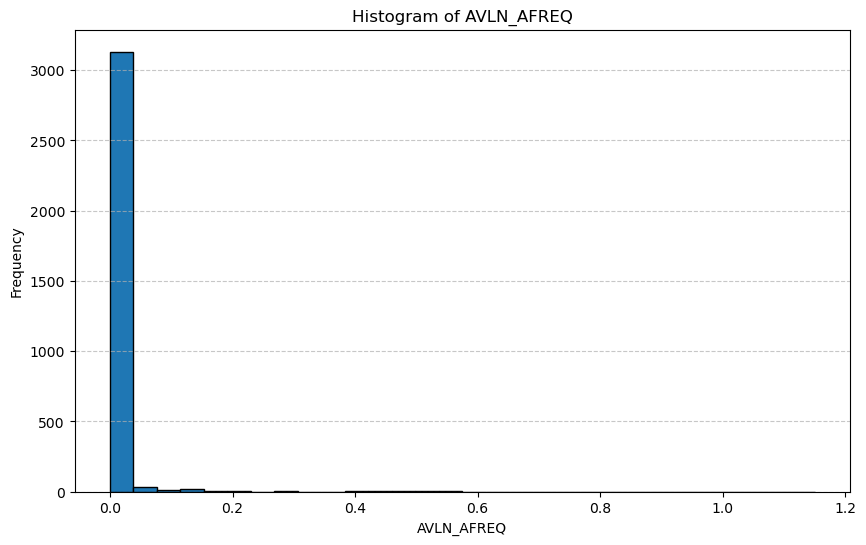

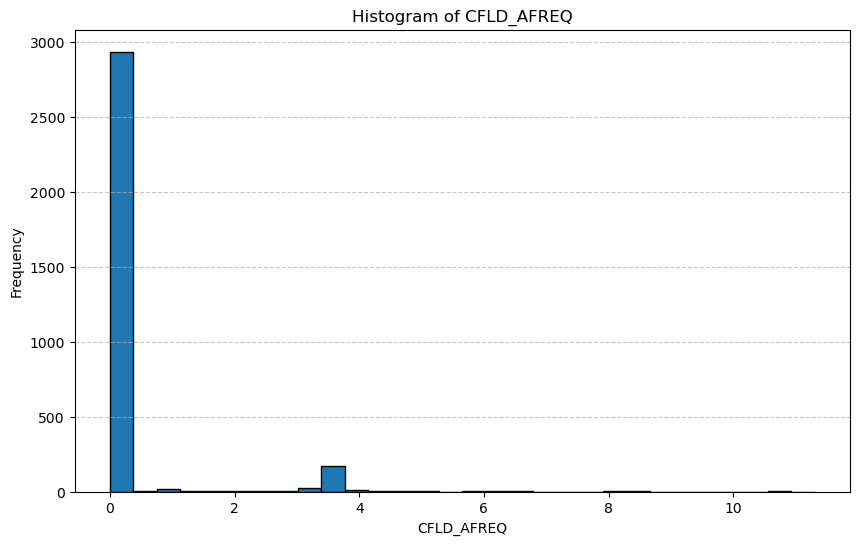

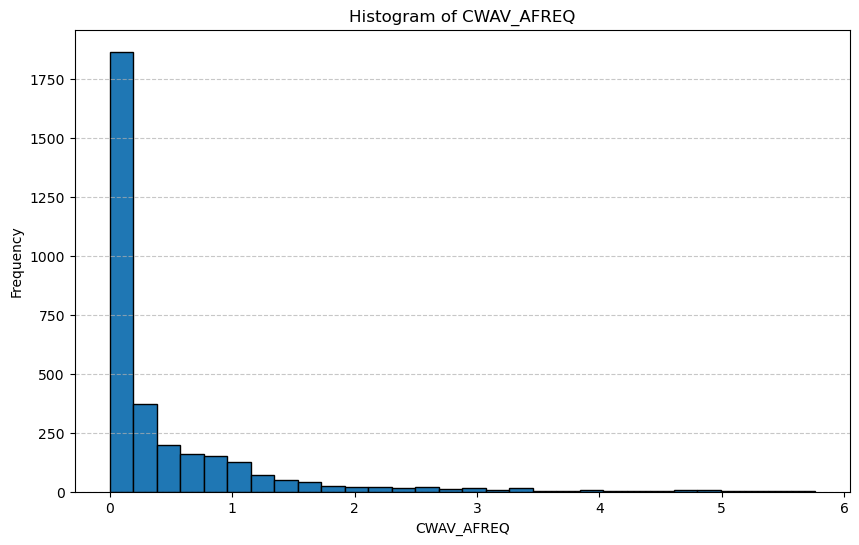

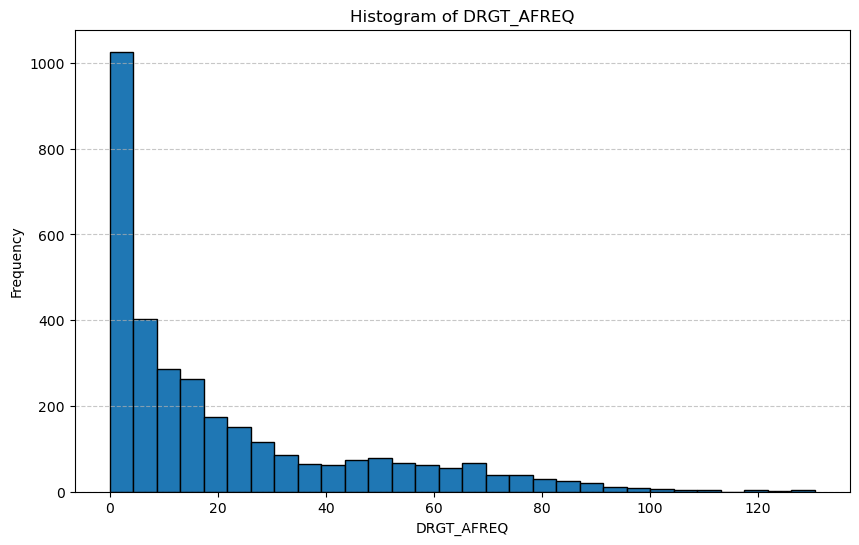

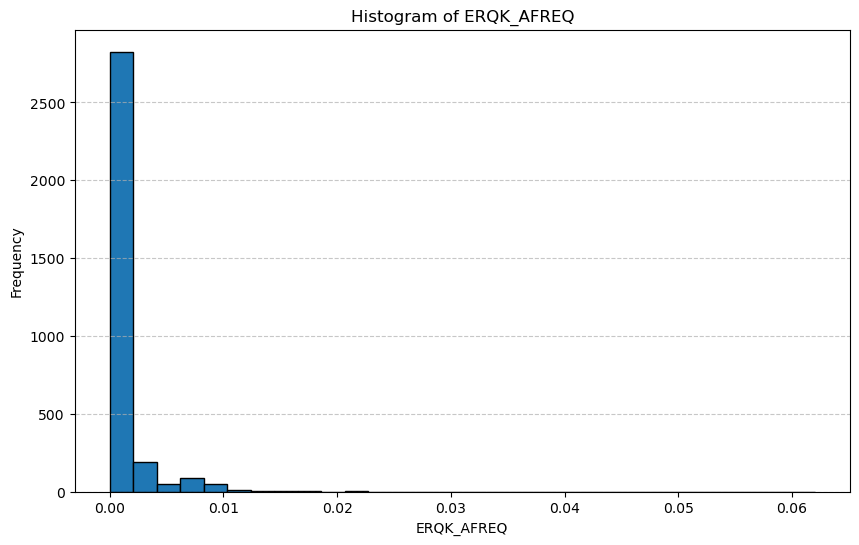

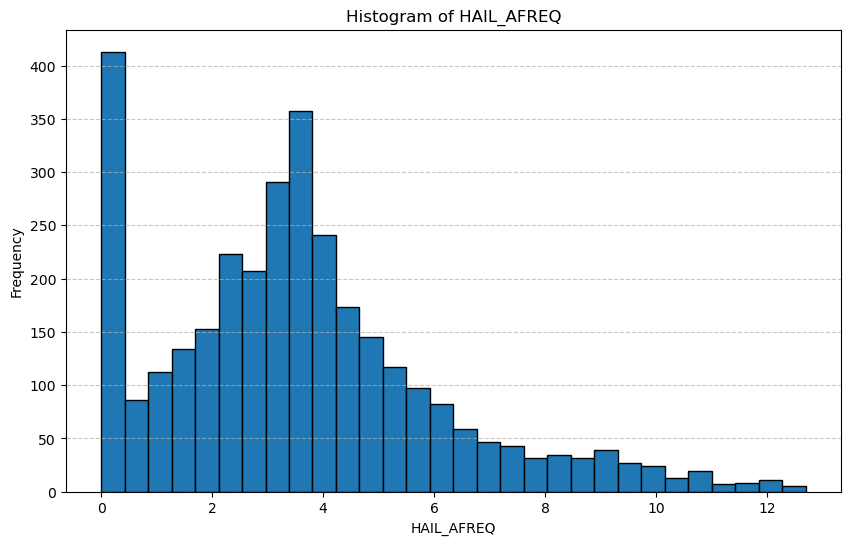

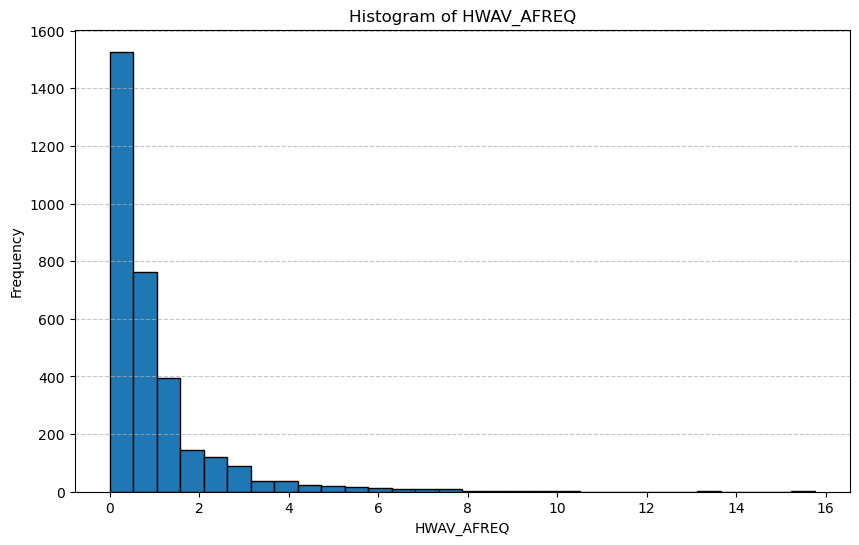

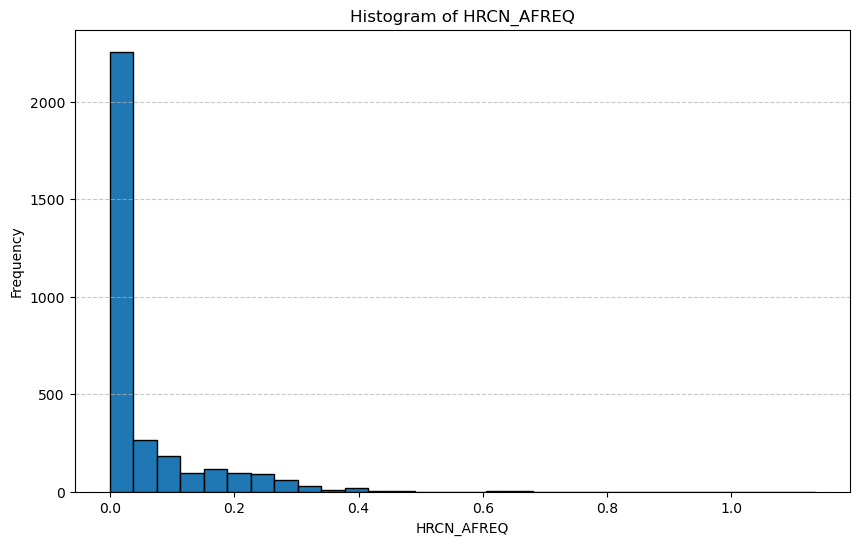

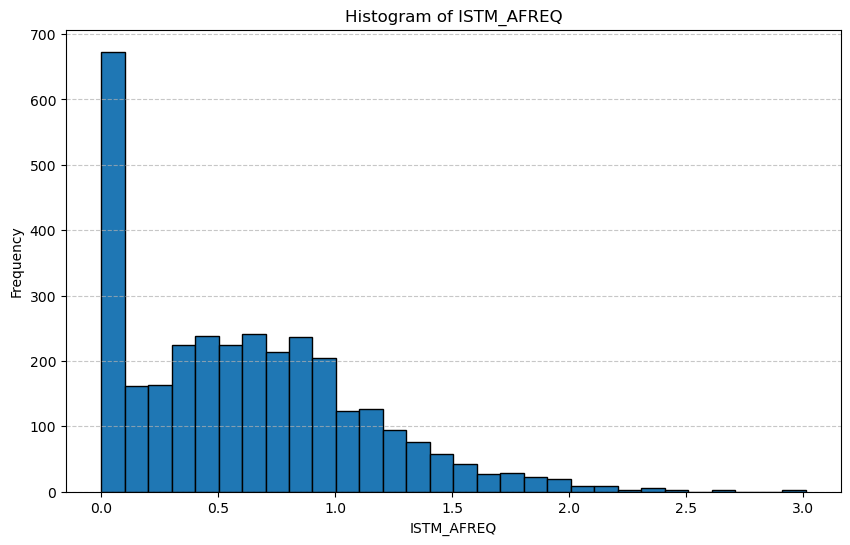

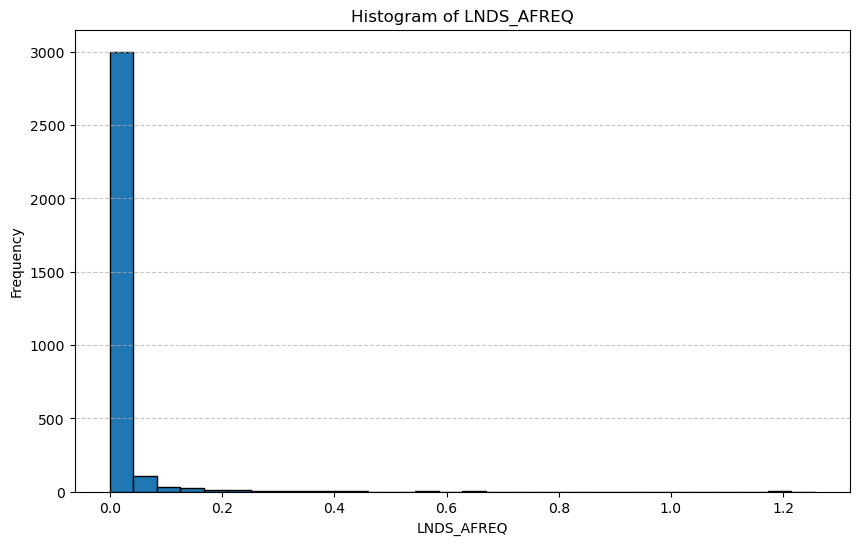

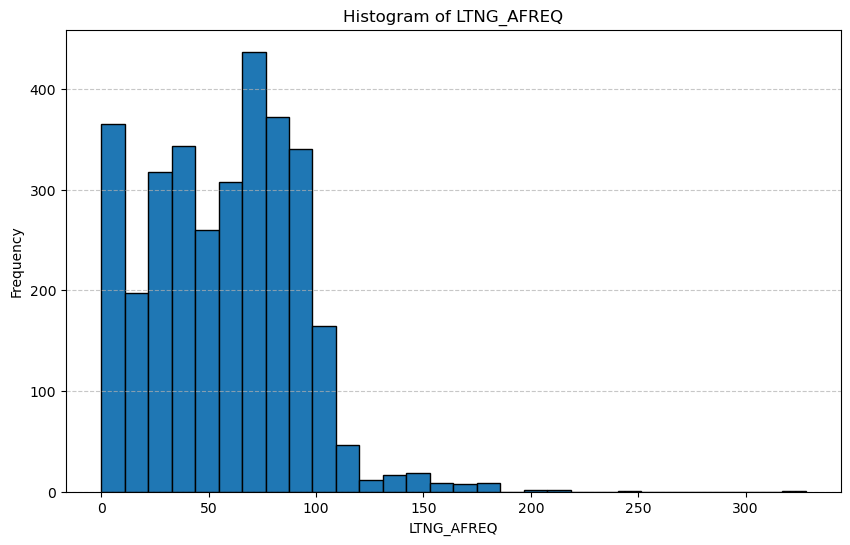

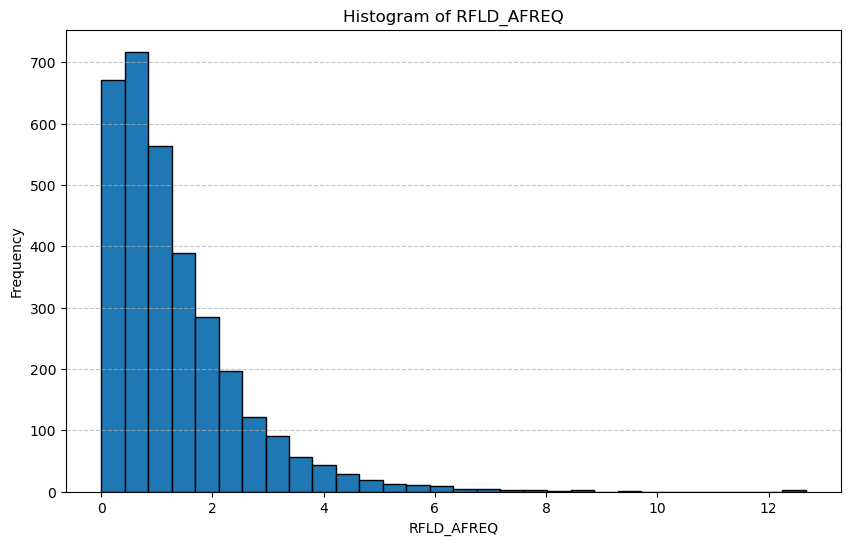

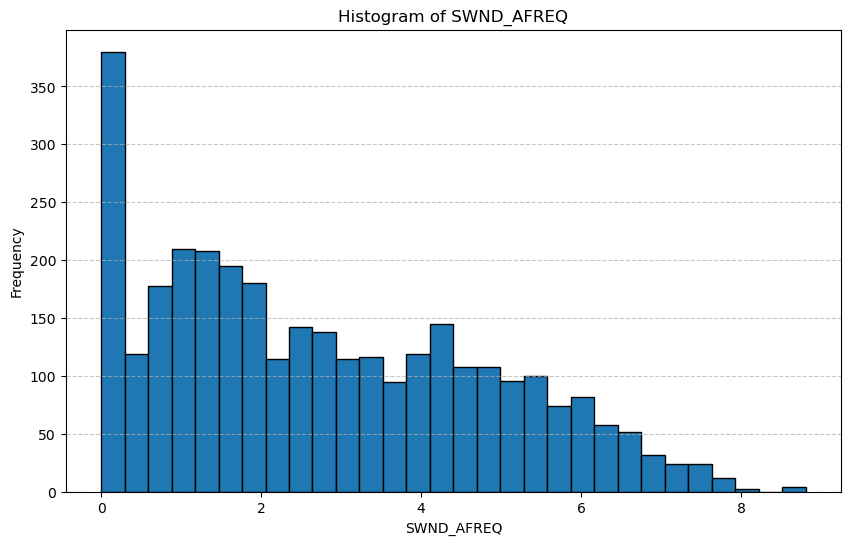

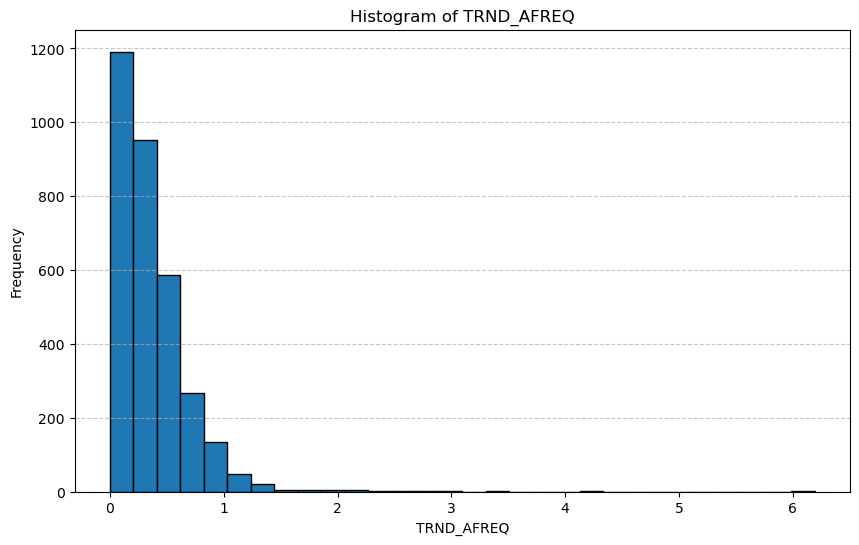

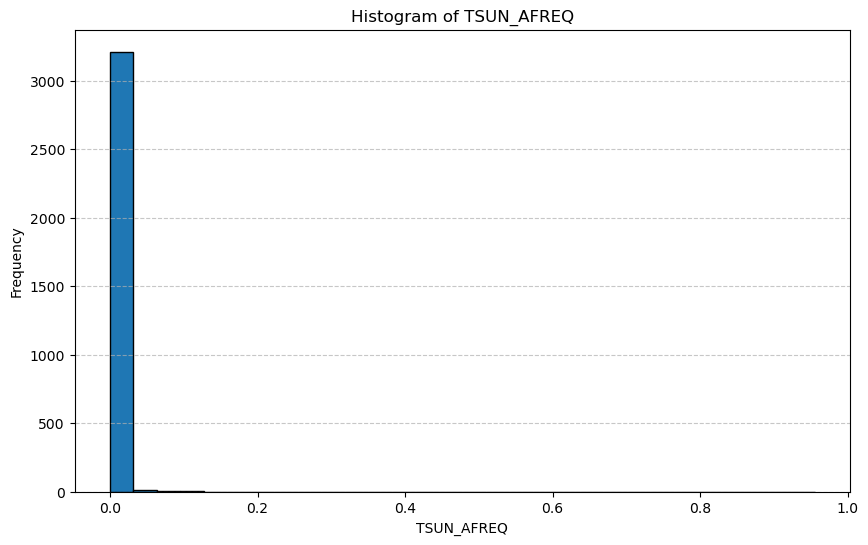

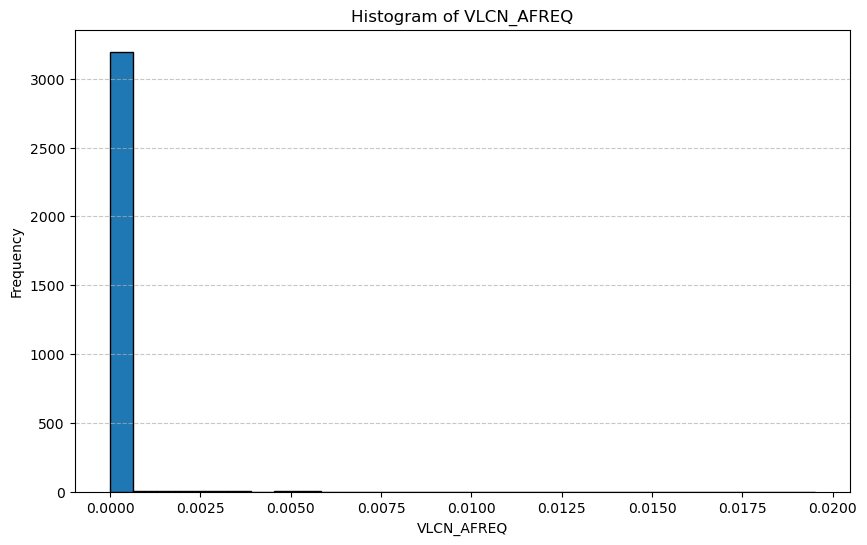

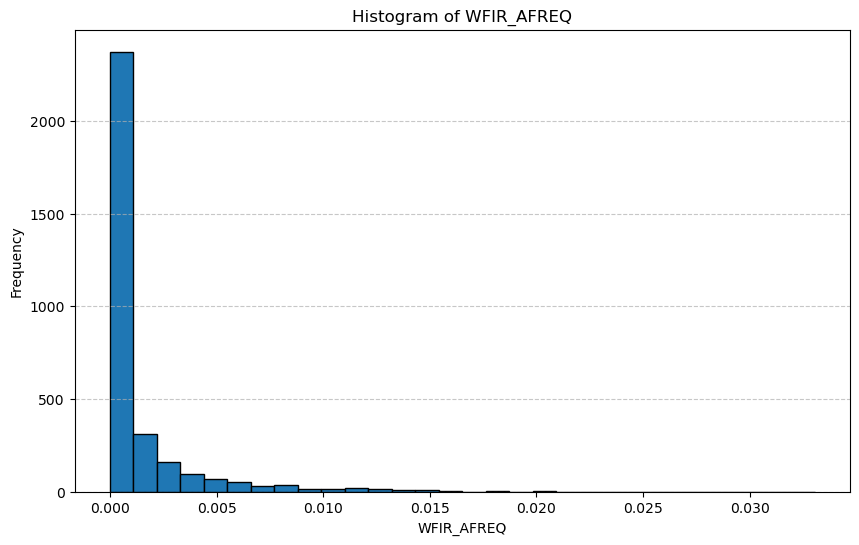

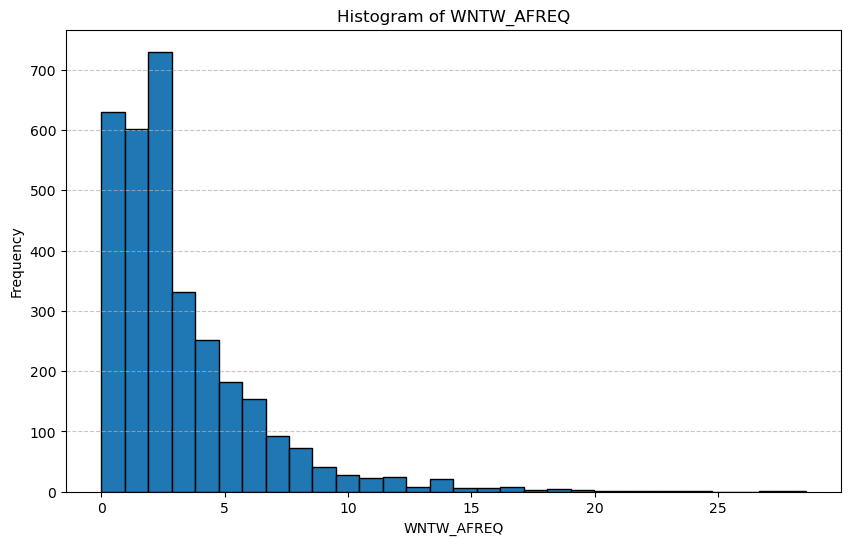

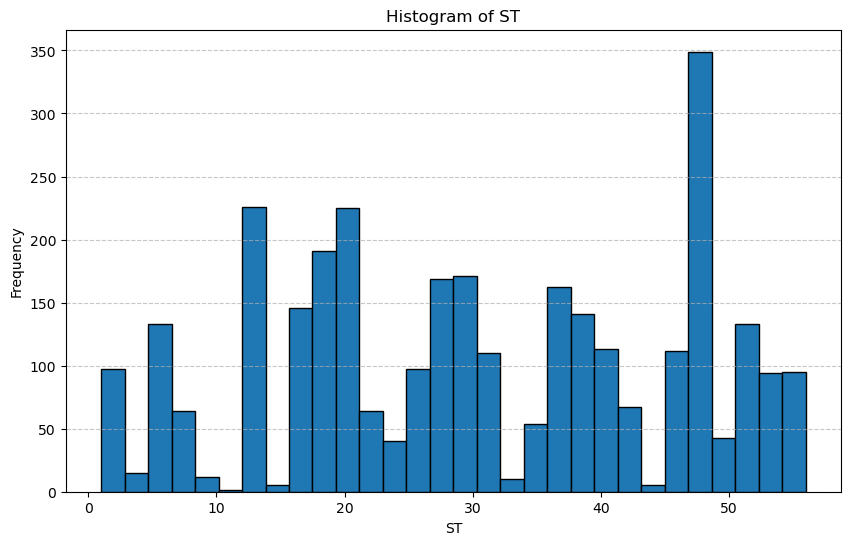

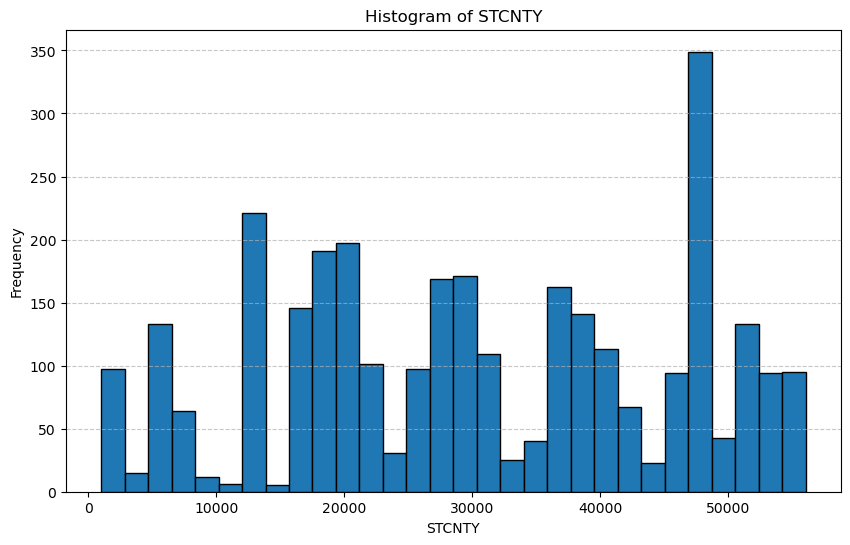

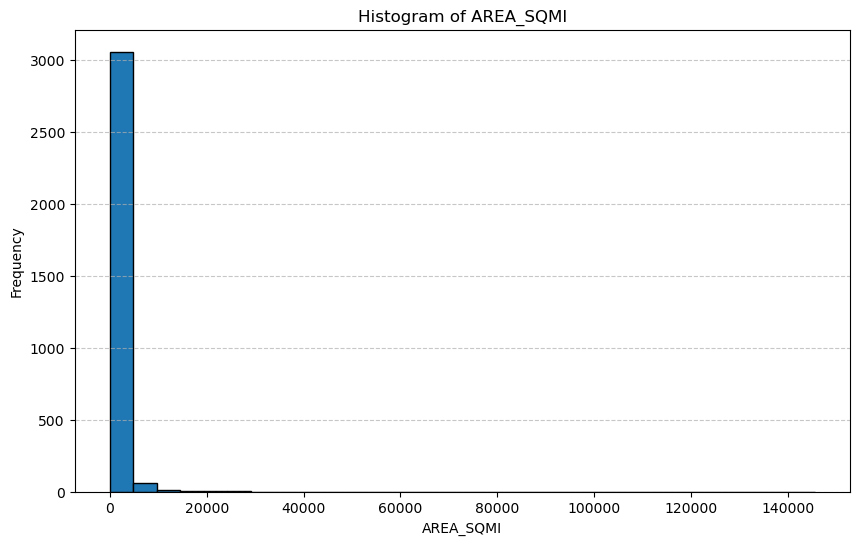

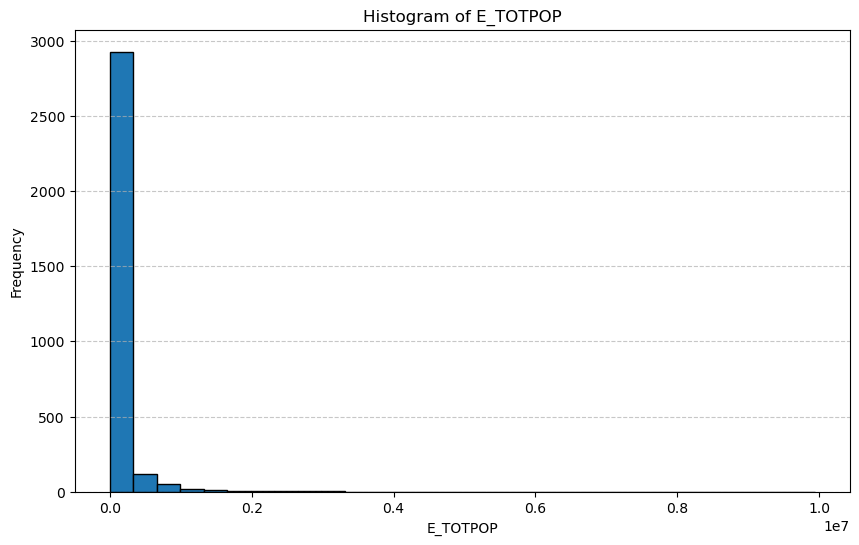

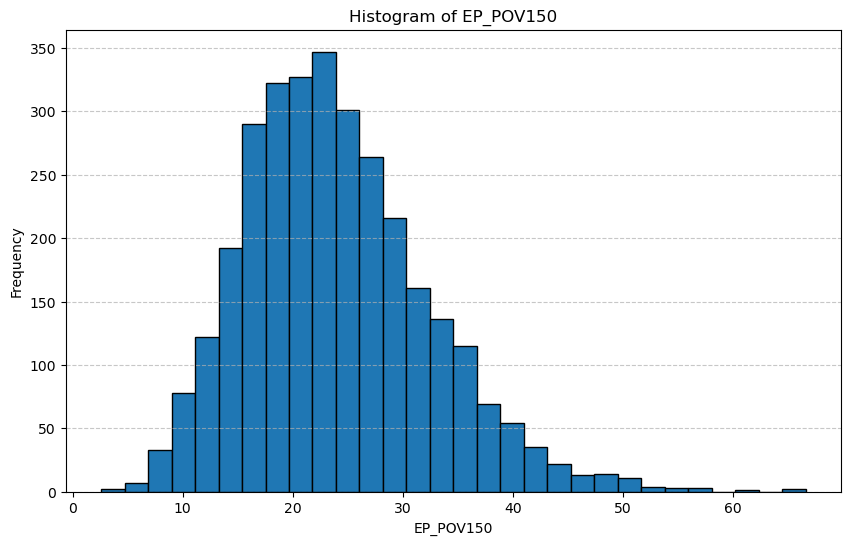

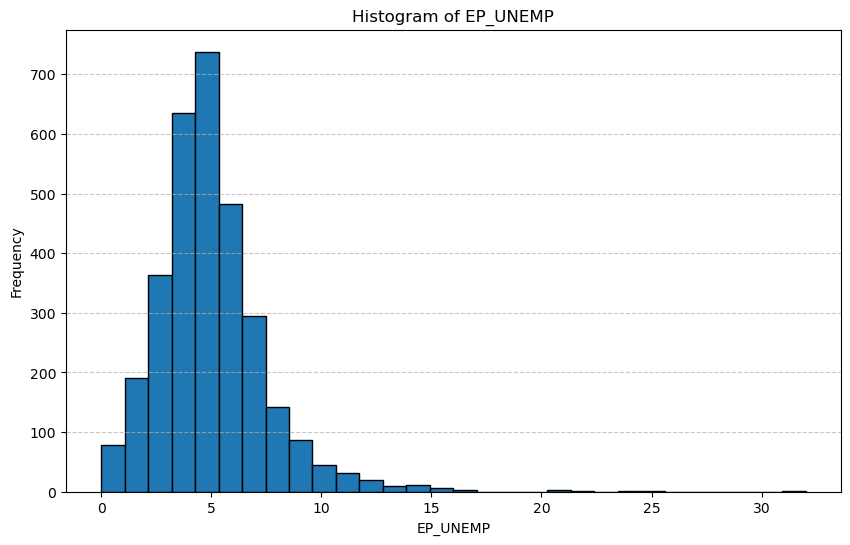

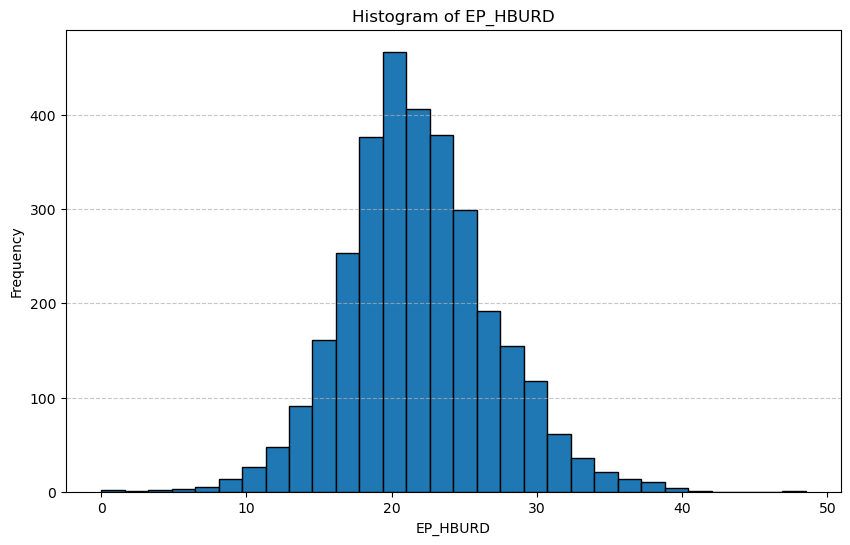

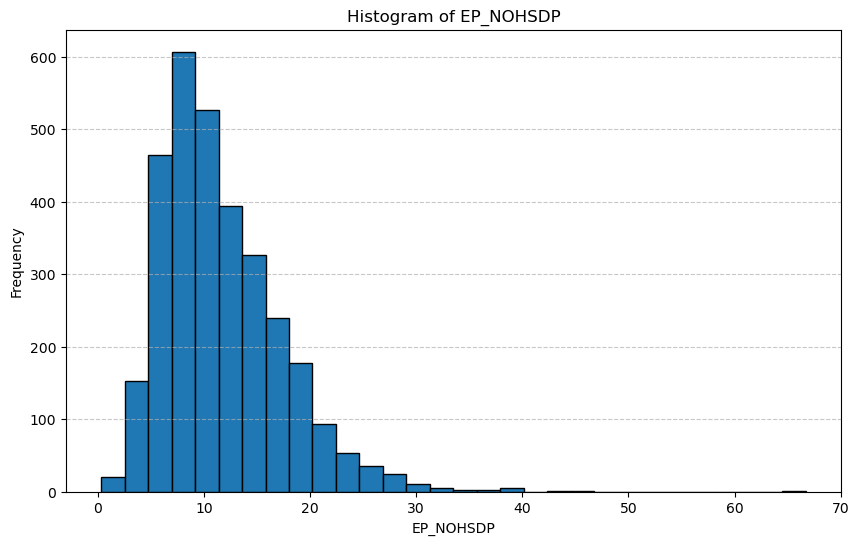

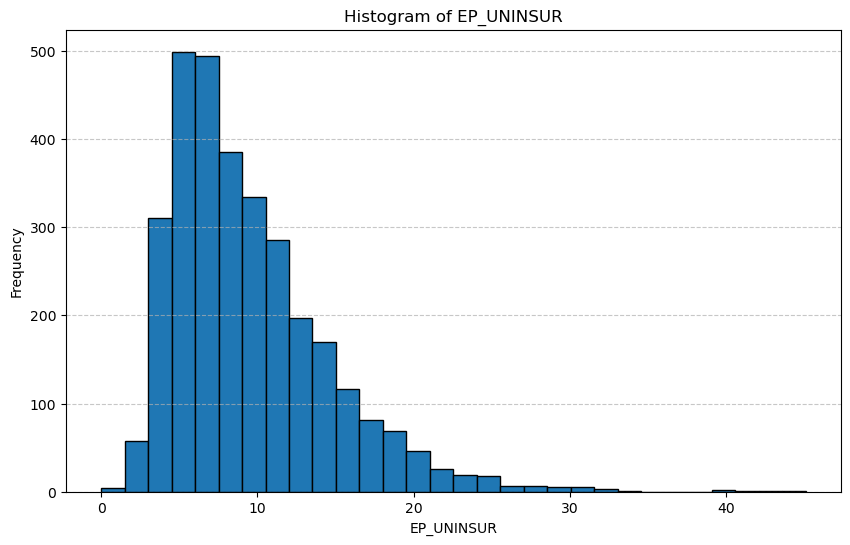

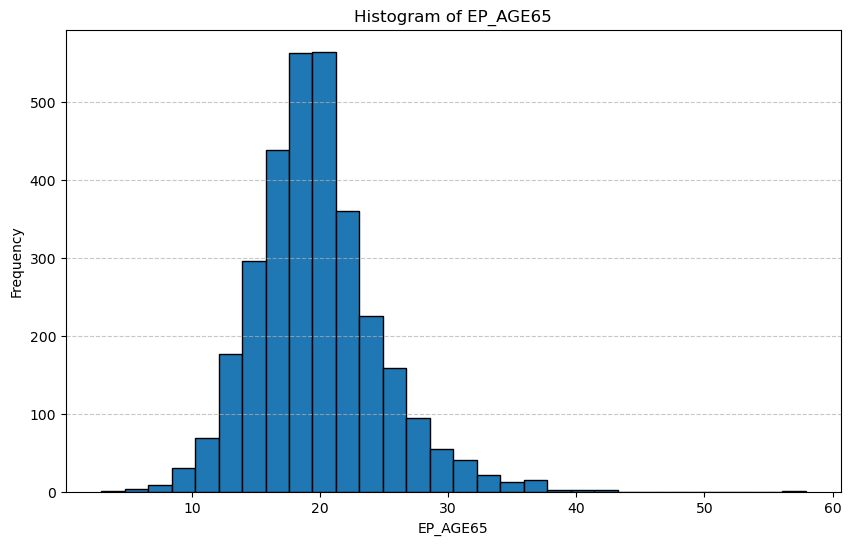

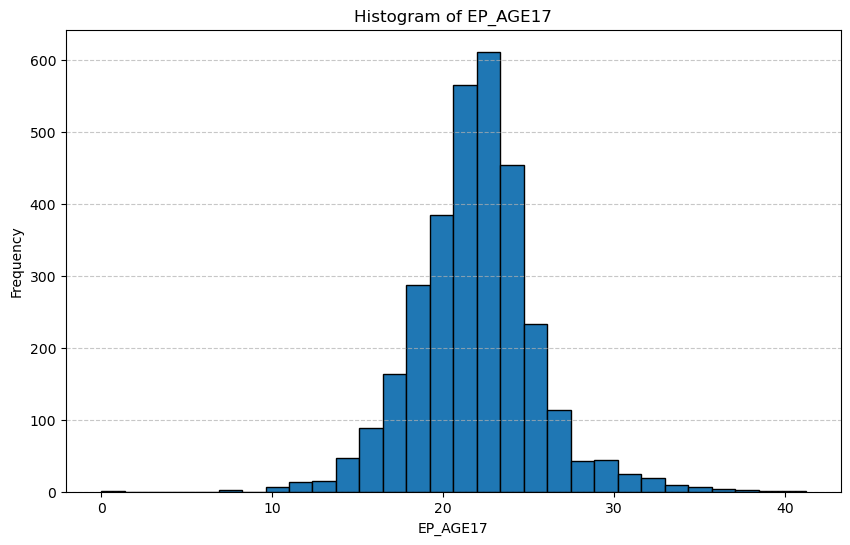

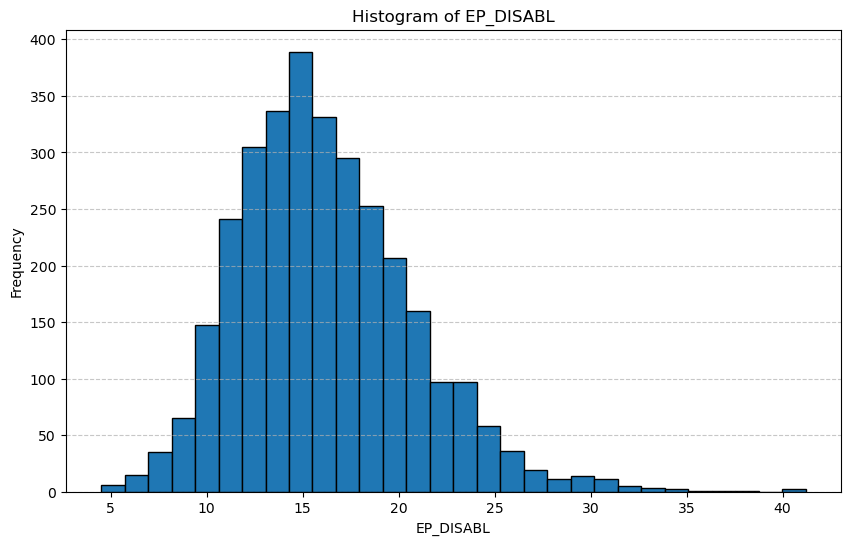

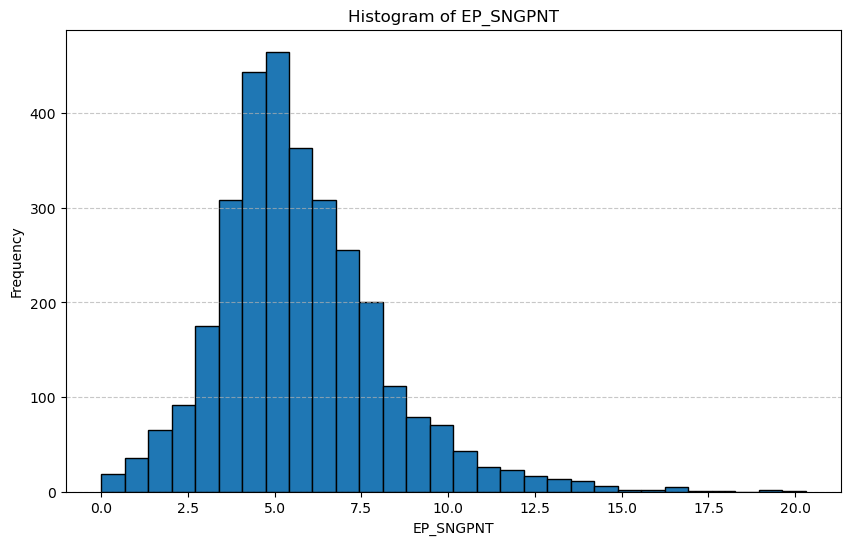

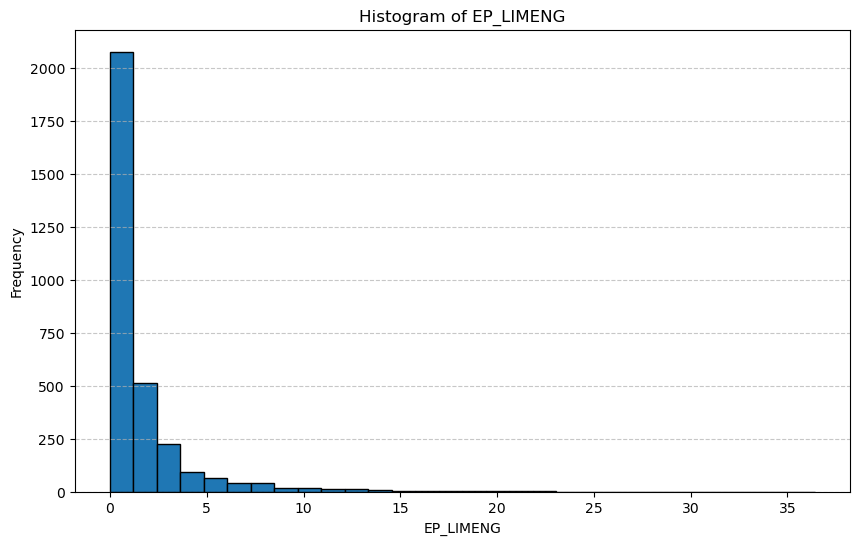

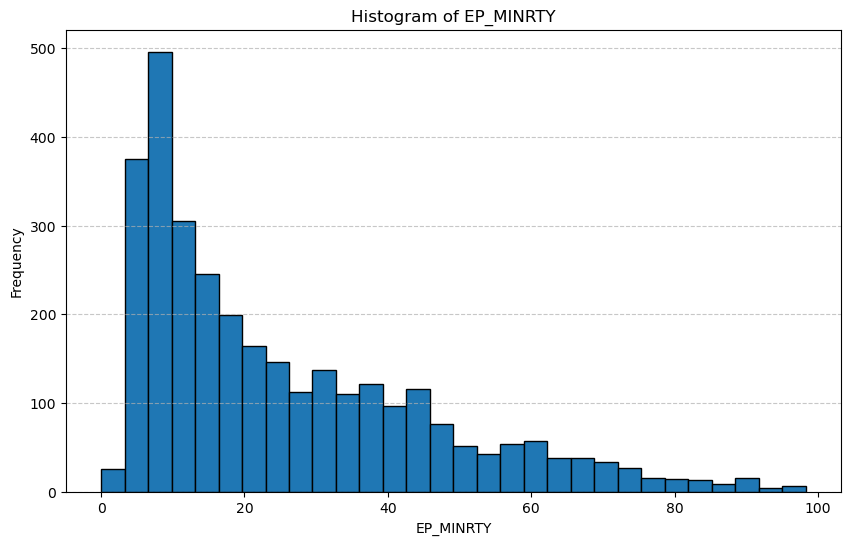

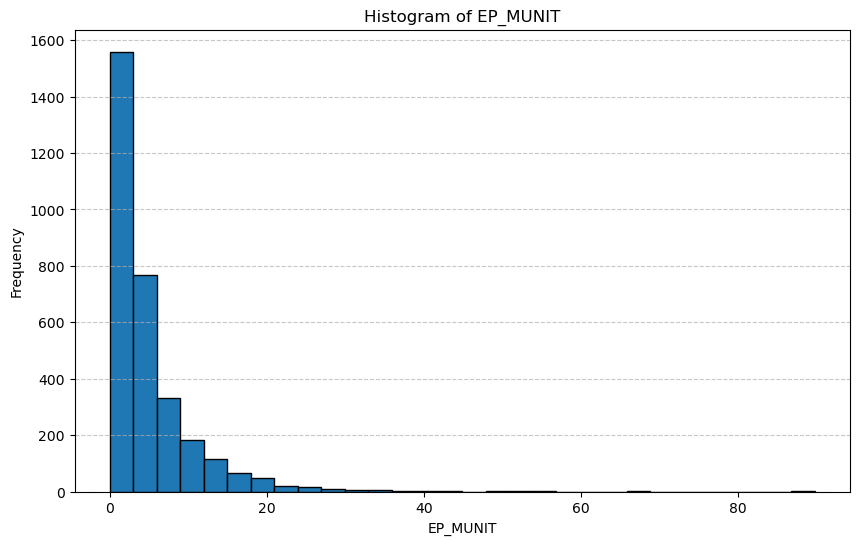

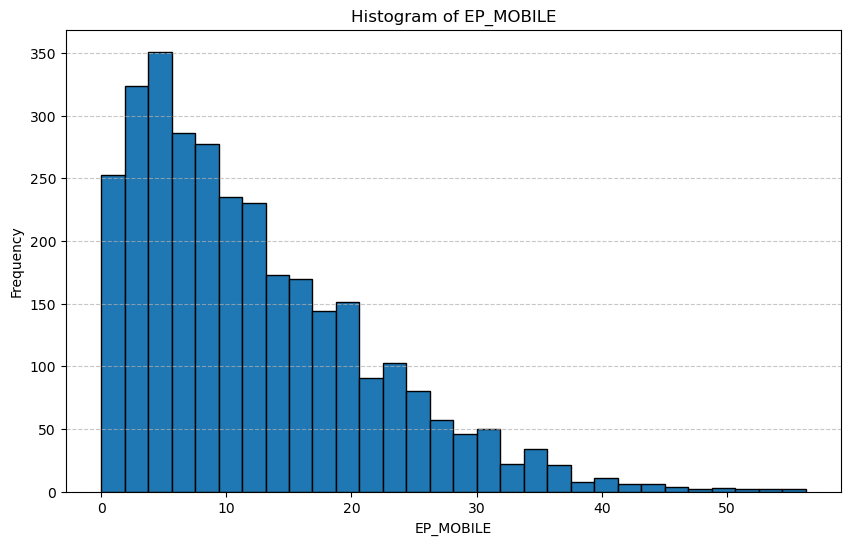

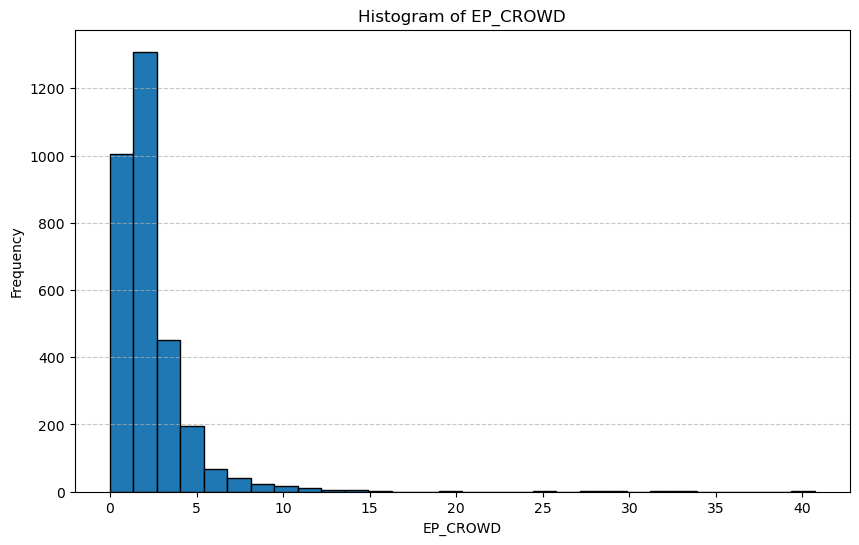

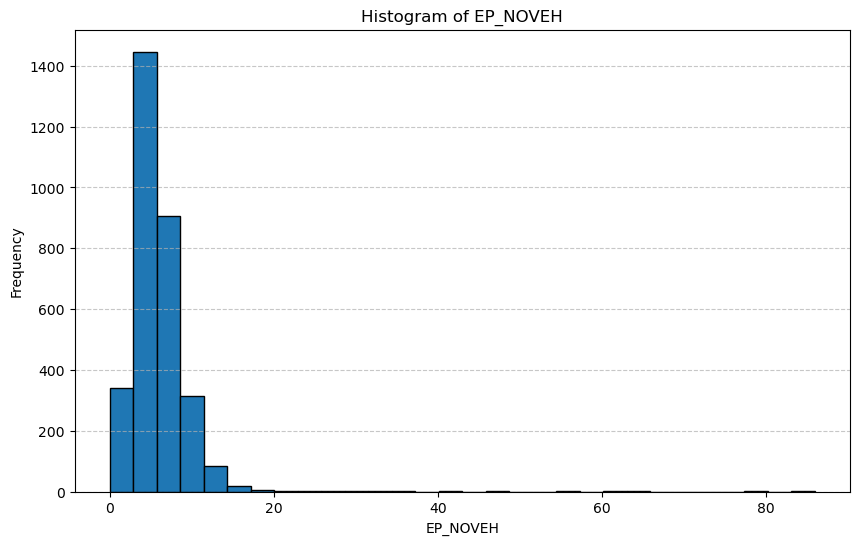

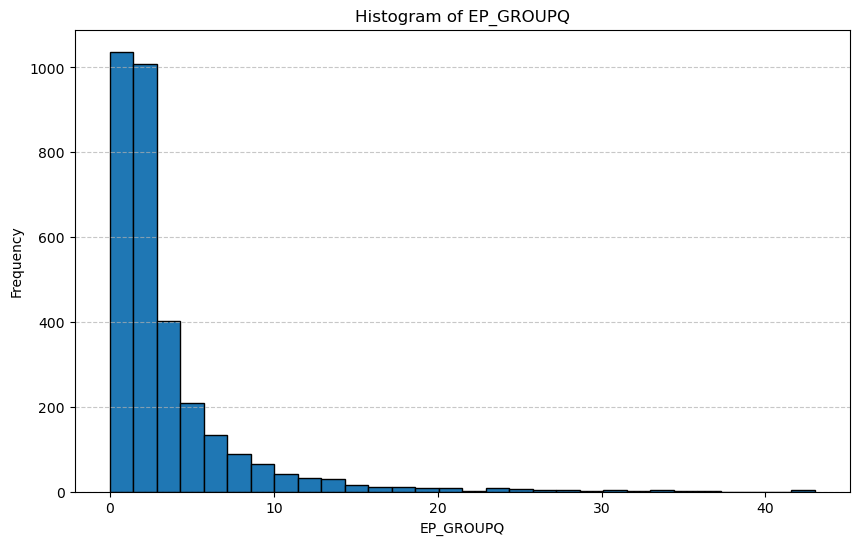

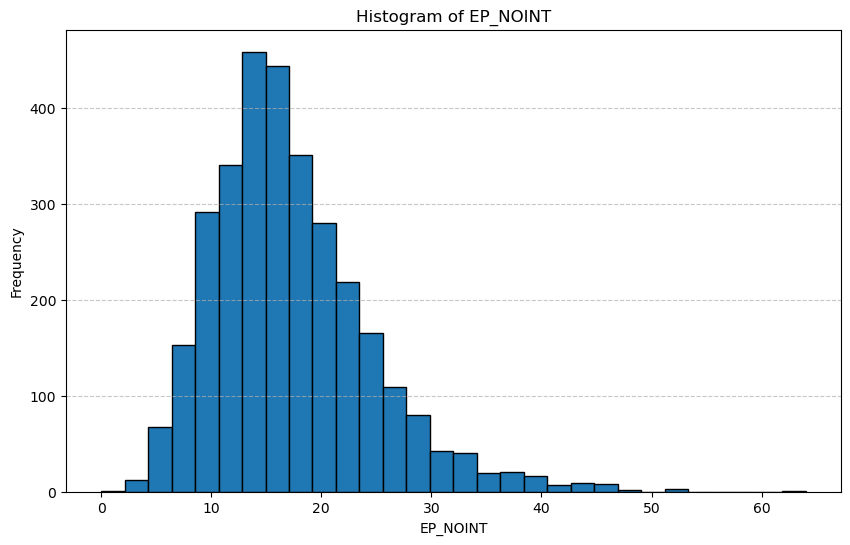

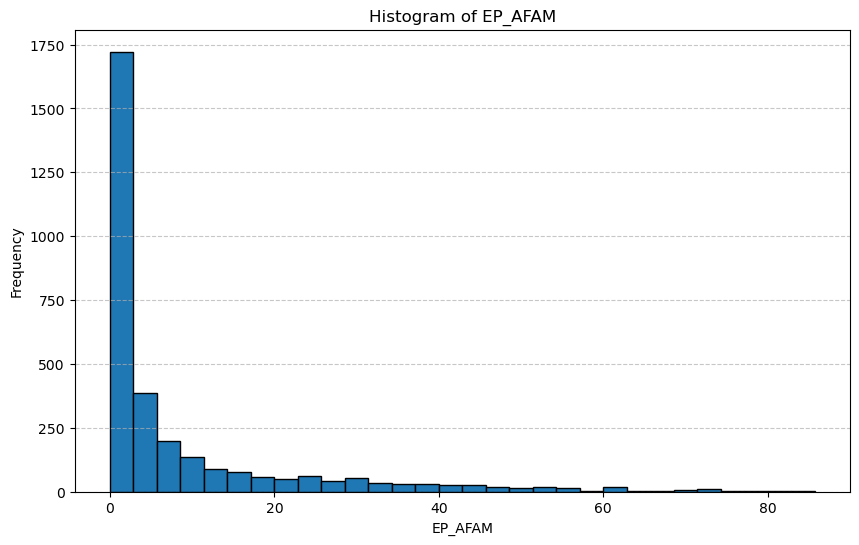

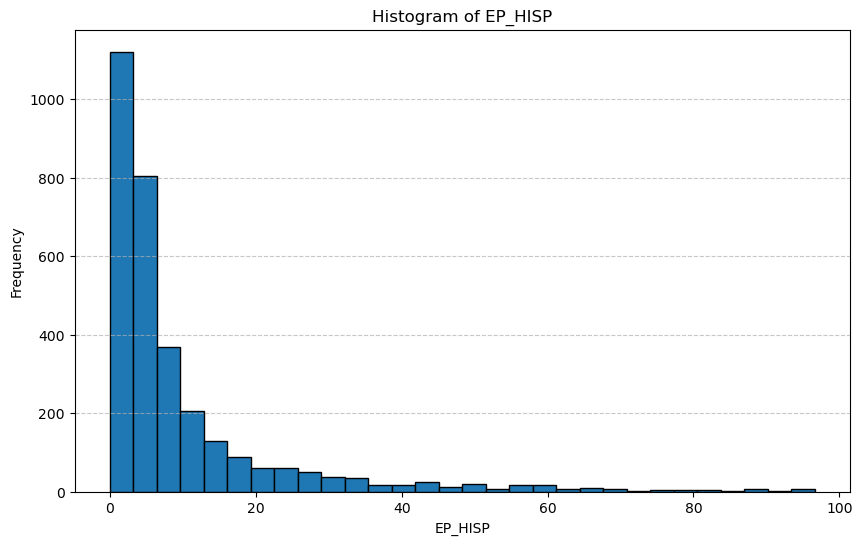

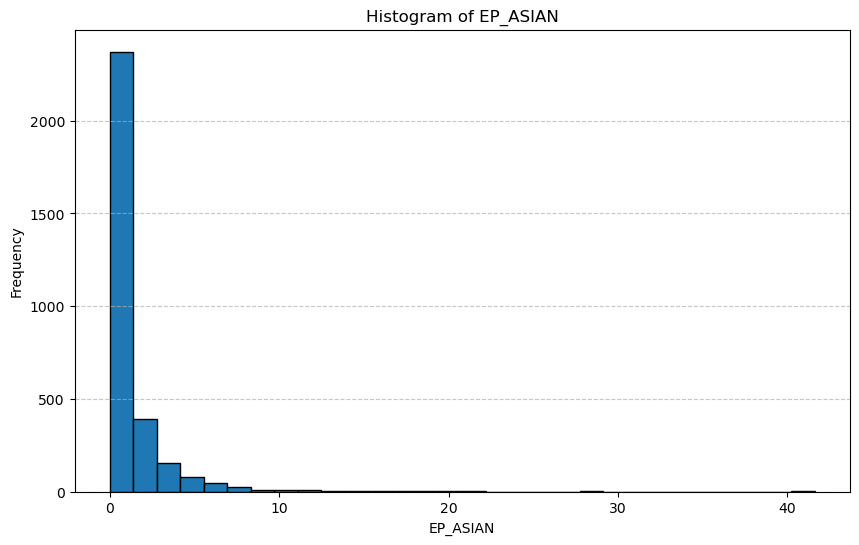

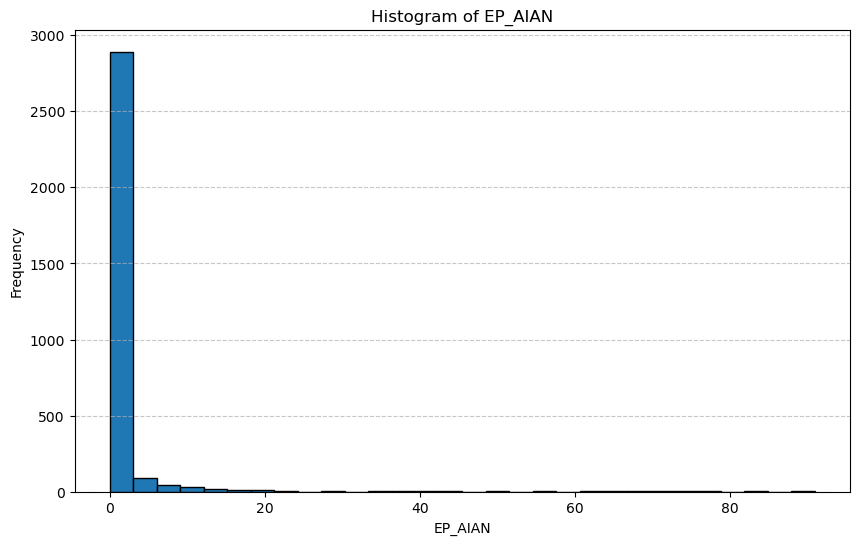

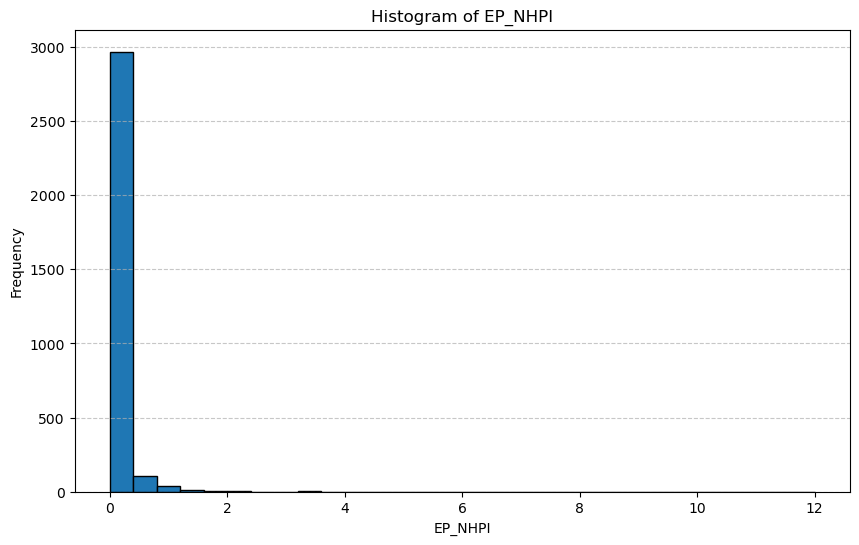

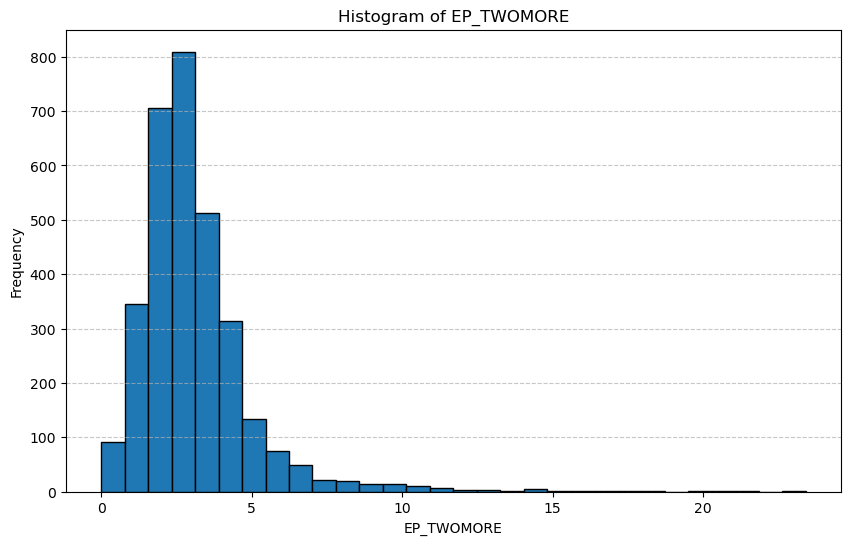

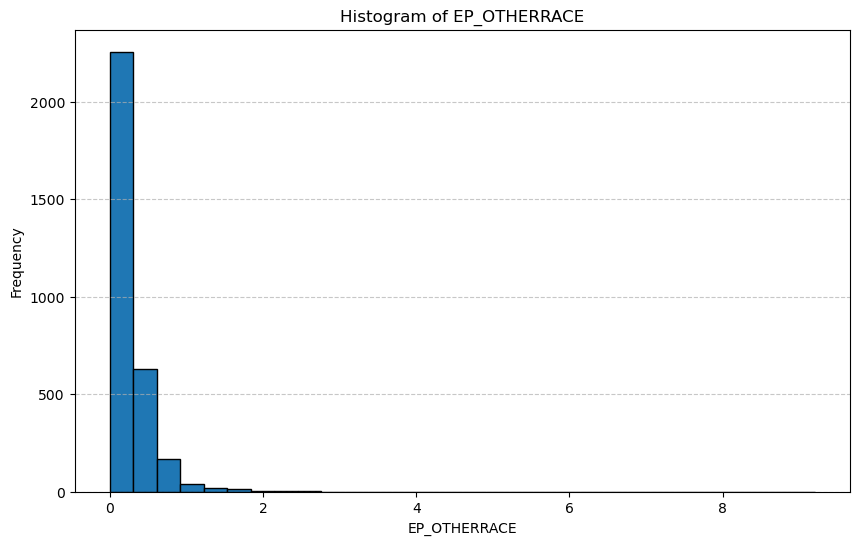

In [50]:
import matplotlib.pyplot as plt

numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

def plot_histogram(data, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Loop through each numerical column and plot the histogram
for column in numerical_columns:
    plot_histogram(merged_data, column)

In [51]:
merged_data.describe()

,AVLN_AFREQ,CFLD_AFREQ,CWAV_AFREQ,DRGT_AFREQ,ERQK_AFREQ,HAIL_AFREQ,HWAV_AFREQ,HRCN_AFREQ,ISTM_AFREQ,LNDS_AFREQ,...,EP_NOVEH,EP_GROUPQ,EP_NOINT,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,EP_NHPI,EP_TWOMORE,EP_OTHERRACE
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,...,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,0.007265,0.343801,0.467068,21.083828,0.001144,3.568693,0.964209,0.052400,0.618261,0.023263,...,6.023123,3.469084,17.217684,8.732570,9.973314,1.409606,1.709192,0.091985,3.105821,0.264695
std,0.053950,1.179405,0.799674,24.339377,0.002419,2.508260,1.380105,0.087831,0.499325,0.074390,...,4.425166,4.336965,7.183909,14.200421,14.054315,2.889120,7.489594,0.472447,1.968423,0.384044
min,0.000000,0.000000,0.000000,0.000000,0.000030,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.802375,0.000183,1.902840,0.123839,0.000000,0.189450,0.010000,...,4.000000,1.200000,12.300000,0.700000,2.500000,0.300000,0.100000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.160722,11.345826,0.000416,3.382273,0.619195,0.011712,0.570446,0.010000,...,5.300000,2.000000,16.100000,2.100000,4.700000,0.600000,0.200000,0.000000,2.800000,0.200000
75%,0.000000,0.000000,0.557343,30.563475,0.000897,4.744847,1.115519,0.060621,0.921345,0.010247,...,7.200000,3.900000,21.000000,9.700000,10.600000,1.300000,0.500000,0.100000,3.700000,0.400000
max,1.150000,11.305961,5.758514,130.454545,0.061974,12.699481,15.751946,1.133779,3.009846,1.255906,...,85.900000,43.000000,64.000000,85.700000,96.600000,41.600000,90.900000,12.000000,23.400000,9.200000


In [52]:
numerical_columns.shape

(46,)